In [72]:
%cd /Users/rodrigo/Post-Grad/CC400/Repo

/Users/rodrigo/Post-Grad/CC400/Repo


In [73]:
from utils import compute_KNN_graph

In [44]:
import nibabel as nib
import os
import matplotlib.pyplot as plt
from nilearn import image as nimg
from nilearn import plotting as nplot
import pandas as pd
import numpy as np

#from bids import BIDSLayout

img = nib.load(r'/Users/rodrigo/Post-Grad/CC400/ADHD200_CC200_TCs_filtfix/templates/ADHD200_parcellate_200.nii.gz')
img_data = img.get_fdata()
img_data.shape

(49, 58, 47)

In [50]:
def correlation_matrix(size, corr):
    corr_matrix = np.zeros((size,size))
    cont = 0

    for i in range(size):
        for j in range(i, size):
            if i == j:
                corr_matrix[i,j] = 1#float('nan')


            else:
                corr_matrix[i,j] = corr[cont]
                corr_matrix[j,i] = corr[cont]
                cont += 1 
    return corr_matrix

In [3]:
def import_data(fisher):
    if fisher == True:
        df = pd.read_csv(r'/Users/rodrigo/Post-Grad/CC400/corr_matrices_fisher.csv',index_col=['Institution','Subject'])
        phenotypic = pd.read_csv(r'/Users/rodrigo/Post-Grad/CC400/phenotypic.csv',index_col=['Institution','Subject'])
    else:
        df = pd.read_csv(r'/Users/rodrigo/Post-Grad/CC400/corr_matrices.csv',index_col=['Institution','Subject','Run'])
        phenotypic = pd.read_csv(r'/Users/rodrigo/Post-Grad/CC400/phenotypic.csv',index_col=['Institution','Subject'])
    return df,phenotypic

In [31]:
df, phenotypic = import_data(fisher=True)
df = ((df.reset_index()).drop(columns=['Institution', 'Subject'])).dropna(subset=[str(x) for x in range(0,17955)])
df = np.tanh(df)

In [62]:
A = correlation_matrix(190,df.iloc[2].values)
A = np.array(compute_KNN_graph(A, 10))

In [63]:
print(img)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (49, 58, 47)
affine:
[[  -4.   -0.   -0.   96.]
 [  -0.    4.   -0. -132.]
 [   0.    0.    4.  -70.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 3 49 58 47  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.  4.  4.  4.  0.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner

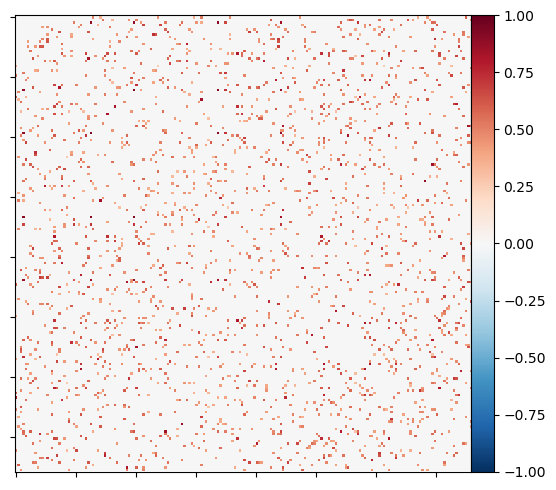

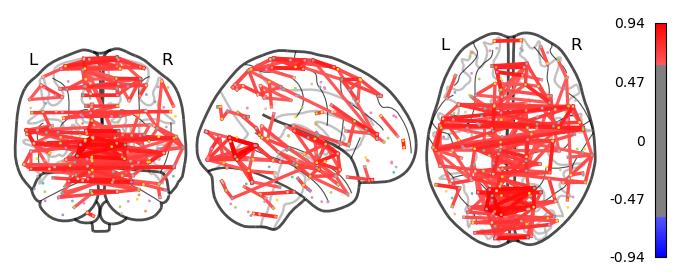

In [64]:
#title = 'Correlation between %d regions' % n_regions_extracted

# First plot the matrix
display = nplot.plot_matrix(A, vmax=1, vmin=-1,
                               colorbar=True)

# Then find the center of the regions and plot a connectome
coords_connectome = nplot.find_parcellation_cut_coords(img)

nplot.plot_connectome(A, coords_connectome,
                         edge_threshold='99%', node_size=1,colorbar=True)

In [66]:
view= nplot.view_connectome(A, coords_connectome,edge_threshold='99%', node_size=1,colorbar=True)
# uncomment this to open the plot in a web browser:

#view.open_in_browser()

view



/opt/homebrew/Caskroom/miniforge/base/envs/GCN_study/lib/python3.9/site-packages/nilearn/regions/region_extractor.py:546: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  new_labels_img = new_img_like(labels_img, new_labels_data, affine=affine)


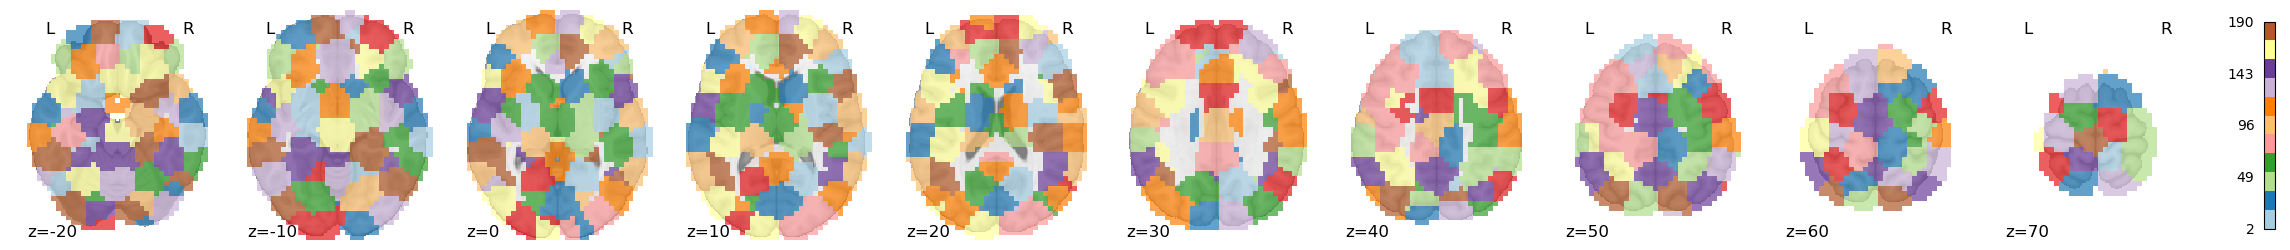

In [67]:
from nilearn.regions import connected_label_regions
region_labels = connected_label_regions(img)
nplot.plot_roi(region_labels,
			cut_coords=(-20,-10,0,10,20,30,40,50,60,70),
			display_mode='z',
			colorbar=True,
			cmap='Paired',
			title='')

Text(0.5, 0.98, 'Center slices for EPI image')

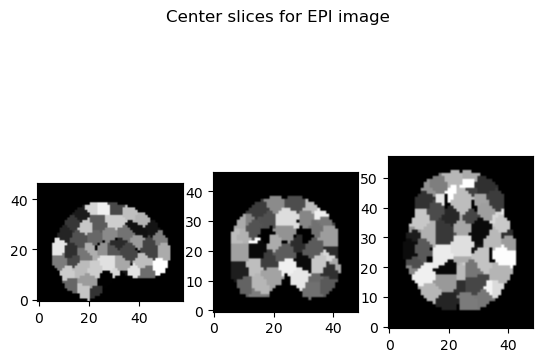

In [68]:
import matplotlib.pyplot as plt
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")
slice_0 = img_data[26, :, :]
slice_1 = img_data[:, 30, :]
slice_2 = img_data[:, :, 16]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for EPI image")  

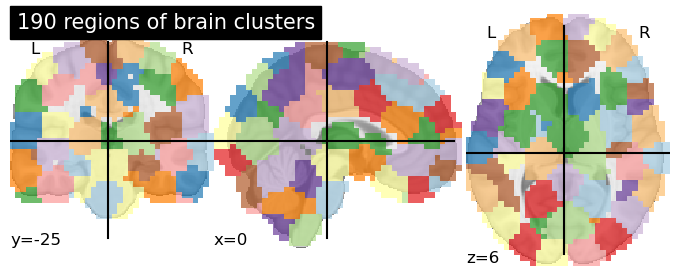

In [71]:
# import plotting module and use `plot_roi` function, since the maps are in 3D
from nilearn import plotting

# The coordinates of all plots are selected automatically by itself
# We manually change the colormap of our choice
plotting.plot_roi(img, cmap='Paired',
                  title='190 regions of brain clusters')



plotting.show()

In [39]:
import nipype.interfaces.fsl.maths as fsl

fsl.
#fsl.maths()

# Using Nilearn and ADHD-200

In [46]:
from nilearn import datasets
num = 40
adhd_data = datasets.fetch_adhd(n_subjects=num)


Dataset created in /Users/rodrigo/nilearn_data/adhd



 ...done. (2 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/fbef5baff0b388a8c913a08e1d84e059/adhd40_metadata.tgz..... done.


Downloaded 27246592 of 44414948 bytes (61.3%,    1.3s remaining) ...done. (6 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_0010042.tgz..... done.


Downloaded 24068096 of 45583539 bytes (52.8%,    0.9s remaining) ...done. (2 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_0010064.tgz..... done.


Downloaded 45047808 of 45461055 bytes (99.1%,    0.0s remaining) ...done. (2 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_0010128.tgz..... done.


Downloaded 45645824 of 46216320 bytes (98.8%,    0.0s remaining) ...done. (2 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_0021019.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_0023008.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_0023012.tgz..... done.


Downloaded 66560000 of 72402326 bytes (91.9%,    0.3s remaining) ...done. (3 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_0027011.tgz..... done.


Downloaded 67772416 of 76184603 bytes (89.0%,    0.4s remaining) ...done. (4 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_0027018.tgz..... done.


Downloaded 66830336 of 70074120 bytes (95.4%,    0.1s remaining) ...done. (3 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_0027034.tgz..... done.


Downloaded 63946752 of 69291635 bytes (92.3%,    0.3s remaining) ...done. (3 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_0027037.tgz..... done.


Downloaded 22904832 of 41803342 bytes (54.8%,    0.9s remaining) ...done. (2 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_1019436.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_1206380.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_1418396.tgz..... done.


Downloaded 46661632 of 62682233 bytes (74.4%,    0.7s remaining) ...done. (3 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_1517058.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_1552181.tgz..... done.


Downloaded 45957120 of 60663491 bytes (75.8%,    0.6s remaining) ...done. (3 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_1562298.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_1679142.tgz..... done.


Downloaded 22528000 of 33119052 bytes (68.0%,    0.5s remaining) ...done. (2 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_2014113.tgz..... done.


Downloaded 21970944 of 45455025 bytes (48.3%,    1.1s remaining) ...done. (2 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_2497695.tgz..... done.


Downloaded 47104000 of 57992968 bytes (81.2%,    0.5s remaining) ...done. (3 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_2950754.tgz..... done.


Downloaded 67010560 of 67925261 bytes (98.7%,    0.0s remaining) ...done. (3 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_3007585.tgz..... done.


Downloaded 22896640 of 32919780 bytes (69.6%,    0.4s remaining) ...done. (2 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_3154996.tgz..... done.


Downloaded 46809088 of 59835286 bytes (78.2%,    0.6s remaining) ...done. (3 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_3205761.tgz..... done.


Downloaded 44425216 of 61857076 bytes (71.8%,    0.8s remaining) ...done. (3 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_3520880.tgz..... done.


Downloaded 44351488 of 59385206 bytes (74.7%,    0.7s remaining) ...done. (3 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_3624598.tgz..... done.


Downloaded 22781952 of 41518251 bytes (54.9%,    0.8s remaining) ...done. (2 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_3699991.tgz..... done.


Downloaded 21667840 of 32108848 bytes (67.5%,    0.5s remaining) ...done. (2 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_3884955.tgz..... done.


Downloaded 22896640 of 39415752 bytes (58.1%,    0.7s remaining) ...done. (2 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_3902469.tgz..... done.


Downloaded 44654592 of 59297020 bytes (75.3%,    0.7s remaining) ...done. (3 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_3994098.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_4016887.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_4046678.tgz..... done.


Downloaded 69394432 of 69914913 bytes (99.3%,    0.0s remaining) ...done. (3 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_4134561.tgz..... done.


Downloaded 22945792 of 45506732 bytes (50.4%,    1.0s remaining) ...done. (2 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_4164316.tgz..... done.


Downloaded 23863296 of 32363673 bytes (73.7%,    0.4s remaining) ...done. (2 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_4275075.tgz..... done.


Downloaded 67067904 of 73484949 bytes (91.3%,    0.3s remaining) ...done. (4 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_6115230.tgz..... done.


Downloaded 21913600 of 42188959 bytes (51.9%,    0.9s remaining) ...done. (2 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_7774305.tgz..... done.


Downloaded 68919296 of 70396354 bytes (97.9%,    0.1s remaining) ...done. (3 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_8409791.tgz..... done.


Downloaded 23093248 of 45075978 bytes (51.2%,    1.0s remaining) ...done. (2 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_8697774.tgz..... done.


Downloaded 44539904 of 63380505 bytes (70.3%,    0.9s remaining) ...done. (3 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_9744150.tgz..... done.


Downloaded 41959424 of 46607053 bytes (90.0%,    0.2s remaining) ...done. (2 seconds, 0 min)
Extracting data from /Users/rodrigo/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_9750701.tgz..... done.


In [64]:
adhd_data.keys()

dict_keys(['func', 'confounds', 'phenotypic', 'description'])

In [58]:
from nilearn import decomposition
canica = decomposition.CanICA(n_components=20, mask_strategy='background')
canica.fit(adhd_data['func'])
#Retrieving the components
components = canica.components_
#Using a masker to project into the 3D space
components_img = canica.masker_.inverse_transform(components)

NameError: name 'image' is not defined

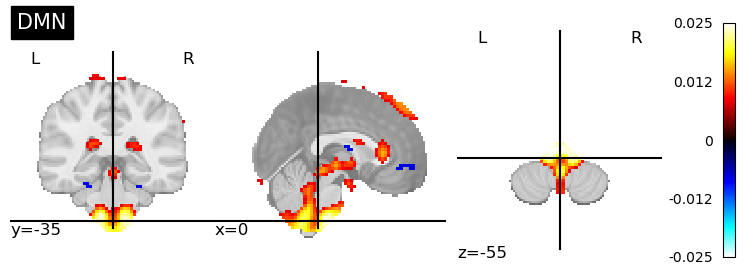

/opt/homebrew/Caskroom/miniforge/base/envs/fmri/lib/python3.9/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/opt/homebrew/Caskroom/miniforge/base/envs/fmri/lib/python3.9/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(data_2d.copy(),
/opt/homebrew/Caskroom/miniforge/base/envs/fmri/lib/python3.9/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),


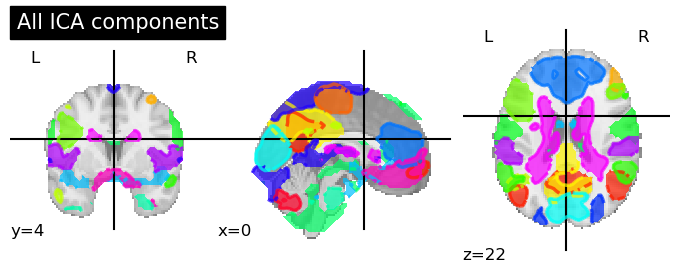

In [60]:
#Plotting the default mode network (DMN) without region extraction
plotting.plot_stat_map(nimg.index_img(components_img, 9), title='DMN')
plotting.show()
#Plotting all the components
plotting.plot_prob_atlas(components_img, title='All ICA components')
plotting.show()

In [51]:
#Using a filter to extract the regions time series 
from nilearn import input_data
masker = input_data.NiftiMapsMasker(adhd_data, smoothing_fwhm=6,
 standardize=False, detrend=True,
 t_r=2.5, low_pass=0.1,
 high_pass=0.01)

#Computing the regions signals and extracting the phenotypic information of interest
subjects = []
adhds = []
sites = []
labels = []
for func_file, confound_file, phenotypic in zip(adhd_data.func, adhd_data.confounds, adhd_data.phenotypic):
    
    time_series = masker.fit_transform(func_file, confounds=confound_file)
    subjects.append(time_series)
    is_adhd = phenotypic['adhd']
    if is_adhd == 1:
        adhds.append(time_series) 
        sites.append(phenotypic['site'])
        labels.append(phenotypic['adhd'])

KeyError: 0

In [45]:
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrices = correlation_measure.fit_transform(subjects)
for i in range(40):
    plt.figure(figsize=(8,6))
    plt.imshow(correlation_matrices[i], vmax=.20, vmin=-.20, cmap='RdBu_r')
    plt.colorbar()
    plt.title('Connectivity matrix of subject {} with label {}'.format(i, labels[i]))

NameError: name 'subjects' is not defined

In [5]:
print(img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 3 49 58 47  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.  4.  4.  4.  0.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 96.0
qoffset_y       : -132.0
qoffset_z       : -70.0
srow_x          : [-4. -0. -0. 96.]
srow_y       

In [6]:
img.affine

array([[  -4.,   -0.,   -0.,   96.],
       [  -0.,    4.,   -0., -132.],
       [   0.,    0.,    4.,  -70.],
       [   0.,    0.,    0.,    1.]])

In [7]:
import sys
sys.path.append("/Users/rodrigo/Post-Grad/CC400/cluster_roi-master")

In [11]:
#### parcel_naming.py
# Copyright (C) 2010 R. Cameron Craddock (cameron.craddock@gmail.com)
#
# This script is a part of the pyClusterROI python toolbox for the spatially
# constrained clustering of fMRI data. It provies functionality for assigning
# labels to regions identified through spatially constrained functional
# parcellation of fMRI data. The spatial overlap is calculated between the
# region and one of several different atlases available with the FSL image
# analysis toolset (http://fsl.fmrib.ox.ac.uk/fsl/fslwiki/). The labels of
# overlapping clusters as well as the amount (percentage) of overlap is written
# to a comma seperated values file.
#
# REQUIRES ATLASES AVAILABLE WITH FSL (http://fsl.fmrib.ox.ac.uk/fsl/fslwiki/).
#
# For more information refer to:
#
# Craddock, R. C.; James, G. A.; Holtzheimer, P. E.; Hu, X. P. & Mayberg, H. S.
# A whole brain fMRI atlas generated via spatially constrained spectral
# clustering Human Brain Mapping, 2012, 33, 1914-1928 doi: 10.1002/hbm.21333.
#
# ARTICLE{Craddock2012,
#   author = {Craddock, R C and James, G A and Holtzheimer, P E and Hu, X P and
#   Mayberg, H S},
#   title = {{A whole brain fMRI atlas generated via spatially constrained
#   spectral clustering}},
#   journal = {Human Brain Mapping},
#   year = {2012},
#   volume = {33},
#   pages = {1914--1928},
#   number = {8},
#   address = {Department of Neuroscience, Baylor College of Medicine, Houston,
#       TX, United States},
#   pmid = {21769991},
# } 
#
# Documentation, updated source code and other information can be found at the
# NITRC web page: http://www.nitrc.org/projects/cluster_roi/ and on github at
# https://github.com/ccraddock/cluster_roi
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
# 
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.
####

# this scripts requires NumPy (numpy.scipy.org), and NiBabel
# (http://nipy.sourceforge.net/nibabel/) to be installed in a directory that is
# accessible through PythonPath 

import nibabel as nb
import numpy as np
from collections import defaultdict
import os, sys

# The following code was adapted from Satra Gosh's sad_figures.py script
# located at https://github.com/satra/sad/blob/master/sad_figures.py
# get cluster coordinates caculate the volume and the center of mass
# of the brain regions in img
def get_region_CoM(img, affine):
    coords = defaultdict(dict)

    # determine the unique regions
    labels = np.setdiff1d(np.unique(img.ravel()), [0])

    for label in labels:

        # calculate the volume of the region
        coords[label]["Vol"]=np.sum(img==label)

        # calculate the center of mass (CoM) of the region
        coords[label]["CoM"]=np.dot(affine,\
            np.hstack((np.mean(np.asarray(np.nonzero(img==label)),\
            axis = 1),1)))[:3].tolist()

    return (coords)

# convert coordinates from one image to another, coords'=inv(A2)*A1*coords
def most_common(lst):
    return max(set(lst), key=lst.count)

def image_downsample_voting(img, affine, down_img_template, down_img_affine):
    down_vals=defaultdict(list)

    old_coords=np.array(np.nonzero(img),dtype="int").T
    for i in range(np.shape(old_coords)[0]):
        new_coords=[str(int(c)) for c in np.round(\
            np.dot(np.linalg.inv(down_img_affine),\
            np.dot(affine,np.hstack((old_coords[i,:],1)))),decimals=0)[:3]]
        down_vals["_".join(new_coords)].append(img[tuple(old_coords[i,:])])

    new_img=np.zeros(np.shape(down_img_template),dtype="int")
    for k in down_vals.keys():
        idx=tuple([ int(n) for n in k.split("_")])
        new_img[idx]=most_common(down_vals[k])

    return (new_img)

def read_and_conform_atlas(atlas_file,atlas_label_file,\
        template_img,template_affine):

    atlas_labels=defaultdict()

    print("Reading in the atlas labels: %s"%(atlas_label_file))
    with open(atlas_label_file,"r") as f:
        for line in f:
            if '#' in line:
                continue
            line=line.rstrip('\n')
            vals=line.split(',')
            atlas_labels[int(vals[0])]=vals[1]

    atlas_labels[0]="None"
    print("Read in the atlas %s"%(atlas_file))
    # lets read in the Harvord Oxford Cortical map
    atlas_nii=nb.load(atlas_file)
    atlas_img=atlas_nii.get_data()

    print("Downsample the atlas")
    # resample the atlas to conform to parcels
    atlas_conform=image_downsample_voting(atlas_img, atlas_nii.get_affine(),\
                                   template_img, \
                                   template_affine);

    #print "Write out the downsampled atlas"
    #out_img=nb.Nifti1Image(atlas_conform,template_affine);
    #out_img.set_data_dtype("int16")
    #out_img.to_filename("atlas_conf.nii.gz")

    return (atlas_labels,atlas_conform)

def main():

    try:
        fsl_path=os.environ['FSLDIR']
    except KeyError:
        print("FSL_DIR is not set in the environment, is FSL installed?")
        sys.exit()

    # This is where the atlases are specified in the format
    # "ATLAS NAME":("path to label file","path to atlas.nii")
    atlas_cfg={\
    "Talairach Daemon":("talairach_labels.csv",\
      os.path.join(fsl_path,\
      "data/atlases/Talairach/Talairach-labels-2mm.nii.gz")),\
    "HarvardOxford Cortical":("harvardoxford_cortical_labels.csv",\
      os.path.join(fsl_path,\
      "data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz")),\
    "HarvardOxford Subcortical":("harvardoxford_subcortical_labels.csv",\
      os.path.join(fsl_path,\
      "data/atlases/HarvardOxford/HarvardOxford-sub-maxprob-thr25-2mm.nii.gz")),\
    "Jeulich Histological":("juelich_labels.csv",\
      os.path.join(fsl_path,\
      "data/atlases/Juelich/Juelich-maxprob-thr25-2mm.nii.gz")),\
    "MNI Structural":("mni_labels.csv",\
      os.path.join(fsl_path,\
      "data/atlases/MNI/MNI-maxprob-thr25-2mm.nii.gz"))}

    if len(sys.argv) < 4:
        print("number of arguements %d"%(len(sys.argv)))
        print("Usage %s <parcellation filename> <outname> <10,20,30,...>"%\
            (sys.argv[0]))
        #sys.exit()

    parcel_filename=sys.argv[1]
    parcel_outname=sys.argv[2]
    parcel_vals=[int(n) for n in sys.argv[3].split(',')]
    print(parcel_vals)
    print("%s called with %s, %s, %s"%(sys.argv[0],parcel_filename,\
        parcel_outname,",".join([str(i) for i in parcel_vals])))

    print("Read in the parcellation results %s"%(parcel_filename))
    # lets read in the parcellation results that we want to label
    parcels_nii=nb.load(parcel_filename)
    parcels_img=parcels_nii.get_data()
    print(np.shape(parcels_img))
    print(len(parcel_vals))
    if len(parcel_vals) != np.shape(parcels_img)[3]:
        print("Length of parcel values (%d) != number of parcel images (%d)"%( \
            len(parcel_vals),np.shape(parcels_img)[3]))
        sys.exit()
    else:
        print("Length of parcel values (%d) == number of parcel images (%d)"%( \
            len(parcel_vals),np.shape(parcels_img)[3]))

    atlases=defaultdict()

    # read in the atlases 
    for k in atlas_cfg.keys():
        atlases[k]=read_and_conform_atlas(atlas_cfg[k][1],atlas_cfg[k][0],\
            parcels_img[:,:,:,0],parcels_nii.get_affine())

    #for p in [0]:
    for p in range(np.shape(parcels_img)[3]):
        fid=open("%s_names_%d.csv"%(parcel_outname,parcel_vals[p]),"w")
        # print out the header
        fid.write("ROI number, volume, center of mass")
        for atlas in atlases:
            fid.write(",%s"%(atlas))
        fid.write("\n")

        p_c=get_region_CoM(parcels_img[:,:,:,p],parcels_nii.get_affine())
        for p_k in p_c.keys():
            fid.write("%d, %d, (%2.1f;%2.1f;%2.1f)"%(p_k,p_c[p_k]["Vol"],
                p_c[p_k]["CoM"][0],p_c[p_k]["CoM"][1],p_c[p_k]["CoM"][2]))
            for atlas in atlases.keys():
                fid.write(",")
                atlas_vals=atlases[atlas][1][np.nonzero(parcels_img[:,:,:,p]==p_k)]
                # calculate a histogram of the values
                atlas_hist=[(n,round(float(sum(atlas_vals==n))/float(len(atlas_vals)),2)) \
                    for n in np.unique(atlas_vals)]
                atlas_hist=sorted(atlas_hist,key=lambda f: -f[1])
                for h in atlas_hist:
                    if h[1] > 0.1:
                        fid.write("[\"%s\": %2.2f]"%(atlases[atlas][0][h[0]],h[1]))
            fid.write("\n")
        fid.close()

if __name__ == "__main__":
    main()

# Example command lines for execution inside ipython
#%run parcel_naming.py tcorr05_2level_all.nii.gz tcorr05_2level '10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,350,400,450,500,550,600,650,700,750,800,850,900,950'
#%run parcel_naming.py scorr05_2level_all.nii.gz scorr05_2level '10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,350,400,450,500,550,600,650,700,750,800,850,900,950'
#%run parcel_naming.py tcorr05_mean_all.nii.gz tcorr05_mean '10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,350,400,450,500,550,600,650,700,750,800,850,900,950'
#%run parcel_naming.py scorr05_mean_all.nii.gz scorr05_mean '10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,350,400,450,500,550,600,650,700,750,800,850,900,950'
#%run parcel_naming.py random_all.nii.gz random '10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,350,400,450,500,550,600,650,700,750,800,850,900,950'

number of arguements 3
Usage /opt/homebrew/Caskroom/miniforge/base/envs/fmri/lib/python3.9/site-packages/ipykernel_launcher.py <parcellation filename> <outname> <10,20,30,...>


IndexError: list index out of range

In [12]:
%tb

IndexError: list index out of range